<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Task_ID           680922 non-null  float64
 1   Equipment_Code    623159 non-null  object 
 2   Facility_Name     750000 non-null  object 
 3   System_Class      749972 non-null  object 
 4   Service_Tag       119579 non-null  float64
 5   Error_Code        72871 non-null   object 
 6   Inspection_Type   621499 non-null  object 
 7   Maintenance_Type  750000 non-null  object 
 8   Project_Stage     749952 non-null  object 
 9   Work_Order        750000 non-null  int64  
 10  Urgency_Level     68974 non-null   object 
 11  Site_Reference    749952 non-null  object 
 12  Planner_ID        750000 non-null  object 
 13  Work_Hours        749958 non-null  float64
 14  Task_Category     749952 non-null  object 
 15  Technician        750000 non-null  object 
 16  Technician_Role   74

C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\1112668335.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Urgency_Level', palette='coolwarm', order=df['Urgency_Level'].value_counts().index)


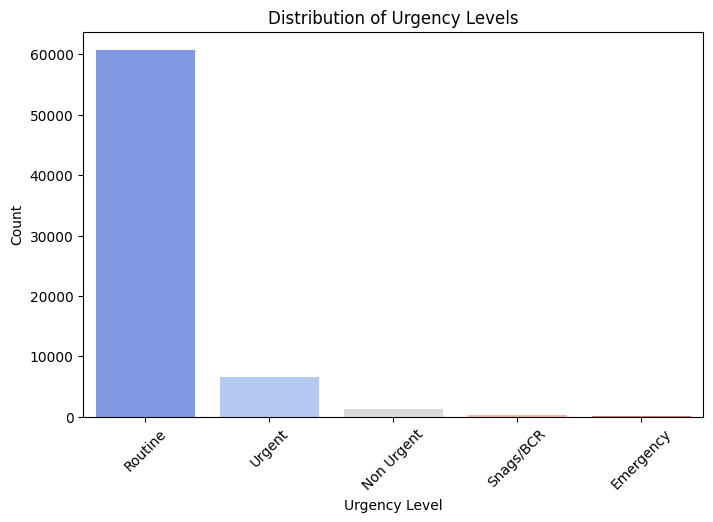

In [293]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('C:/Users/MSIS/Downloads/Bms_data.csv')  # Update the filename if needed

# Display basic info
df.info()
print(df.head())

# Replace hyphens with spaces in System_Class and create a new column for Urgency_Level
df['System_Type'] = df['System_Class'].str.replace('-', ' ', regex=False)
df['Priority_Level'] = df['System_Type'].str.extract(r'(Urgent|Emergency|Non Urgent|Routine|Snags/BCR)', expand=False)

# Remove the urgency level from System_Type
df['System_Type'] = df['System_Type'].str.replace(r'(Urgent|Emergency|Non Urgent|Routine|Snags/BCR)', '', regex=True).str.strip()


# Check missing values
print(df.isnull().sum())

# Visualizing Urgency Levels
def plot_urgency_distribution():
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Urgency_Level', palette='coolwarm', order=df['Urgency_Level'].value_counts().index)
    plt.title("Distribution of Urgency Levels")
    plt.xlabel("Urgency Level")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

plot_urgency_distribution()


# Save cleaned dataset
#df.to_csv('C:/Users/MSIS/Downloads/cleaned_bms_data.csv', index=False)

#print("Dataset cleaning and extraction complete. Cleaned data saved.")


In [294]:
print("Original Dataset")

df.shape

Original Dataset


(750000, 25)

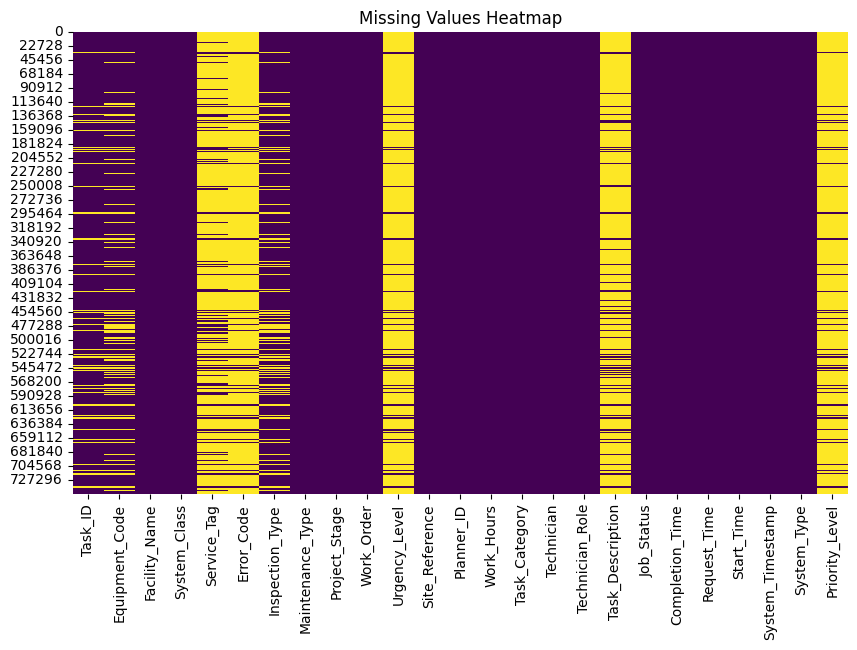

In [295]:
#Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [296]:
# Count missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Task_ID              69078
Equipment_Code      126841
Facility_Name            0
System_Class            28
Service_Tag         630421
Error_Code          677129
Inspection_Type     128501
Maintenance_Type         0
Project_Stage           48
Work_Order               0
Urgency_Level       681026
Site_Reference          48
Planner_ID               0
Work_Hours              42
Task_Category           48
Technician               0
Technician_Role         48
Task_Description    650628
Job_Status               0
Completion_Time        386
Request_Time            48
Start_Time              48
System_Timestamp         1
System_Type             28
Priority_Level      682250
dtype: int64
Task_ID              9.210400
Equipment_Code      16.912133
Facility_Name        0.000000
System_Class         0.003733
Service_Tag         84.056133
Error_Code          90.283867
Inspection_Type     17.133467
Maintenance_Type     0.000000
Project_Stage        0.006400
Work_Order           0.000000
Urgency_Leve

In [297]:
df = df.drop(columns=['System_Class', 'Urgency_Level','System_Timestamp','Technician_Role'])
df.shape

(750000, 21)

In [298]:
# Converting columns to appropriate datatypes
df['Completion_Time'] = pd.to_datetime(df['Completion_Time'], errors='coerce')
df['Request_Time'] = pd.to_datetime(df['Request_Time'], errors='coerce')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
#df['System_Timestamp'] = pd.to_datetime(df['System_Timestamp'], errors='coerce')
# Convert 'Work_Hours' to float 
df['Work_Hours'] = pd.to_numeric(df['Work_Hours'], errors='coerce')

C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\539234141.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Completion_Time'] = pd.to_datetime(df['Completion_Time'], errors='coerce')
C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\539234141.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request_Time'] = pd.to_datetime(df['Request_Time'], errors='coerce')
C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\539234141.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')


In [299]:
df= df.dropna(subset=['Equipment_Code'])
df

,Task_ID,Equipment_Code,Facility_Name,Service_Tag,Error_Code,Inspection_Type,Maintenance_Type,Project_Stage,Work_Order,Site_Reference,...,Work_Hours,Task_Category,Technician,Task_Description,Job_Status,Completion_Time,Request_Time,Start_Time,System_Type,Priority_Level
0,519.0,D2214-K14-B1-09.09-AV-PMDE-UPS-030F,FCLTY-422,30024.0,NaN,Asset,Planned,Phase 1A,1,BDK14,...,1.00,K,Tech-27,work order completed,Work In Progress,2017-04-10 15:00:00,2023-04-19,2017-04-10 14:15:00,No Category,NaN
1,1936.0,H7814-K14-B1-09.03-WF-PMP-DOPU-092M,FCLTY-908,10739.0,NaN,Asset,Planned,Phase 1A,10,BDK14,...,0.25,K,Tech-72,NaN,Completed,2017-02-10 15:45:00,2017-02-10,2017-02-10 15:30:00,No Category,NaN
2,567.0,L5314-K14-B1-09.09-EL-UPS-BATT-037T,FCLTY-386,31271.0,NaN,Asset,Planned,Phase 1A,100,BDK14,...,0.17,K,Tech-124,NaN,Completed,2017-06-10 17:40:00,2017-06-10,2017-06-10 17:30:00,No Category,NaN
3,1897.0,Q9414-K14-B1-09.10-FA-VESD-ASD-052Y,FCLTY-776,21637.0,NaN,Asset,Planned,Phase 1A,1000,BDK14,...,0.50,K,Tech-286,NaN,Completed,2017-11-28 15:02:00,2017-11-28,2017-11-28 14:59:00,No Category,NaN
5,6618.0,T10K1-JK1-02-D.01-AC-ACON-FCU-062P,FCLTY-290,NaN,NaN,Asset,Planned,Phase 1B,100000,BDJK1,...,0.50,JK1,Tech-226,NaN,Completed,2019-06-02 10:15:00,2019-06-02,2019-06-02 09:45:00,No Category,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,522900.0,N8001-I02-A02.04-02-FA-FDAD-SD-010L,FCLTY-451,NaN,NaN,Asset,Planned,Phase 1B,418803,BDI02,...,0.50,I1,Tech-364,NaN,Completed,2021-10-09 14:08:00,2021-01-08,2021-10-09 14:01:00,No Category,NaN
749996,522901.0,F7701-I02-A02.04-02-FA-FDAD-SD-071L,FCLTY-205,NaN,NaN,Asset,Planned,Phase 1B,418804,BDI02,...,0.50,I1,Tech-118,NaN,Completed,2021-10-09 14:09:00,2021-01-08,2021-10-09 14:02:00,No Category,NaN
749997,522917.0,U4801-I02-A02.04-03-FA-FDAD-HD-011H,FCLTY-608,NaN,NaN,Asset,Planned,Phase 1B,418805,BDI02,...,0.50,I1,Tech-452,NaN,Completed,2021-10-09 14:10:00,2021-01-08,2021-10-09 14:02:00,No Category,NaN
749998,522918.0,M1701-I02-A02.04-03-FA-FDAD-HD-076I,FCLTY-564,NaN,NaN,Asset,Planned,Phase 1B,418806,BDI02,...,0.50,I1,Tech-65,NaN,Completed,2021-10-09 14:12:00,2021-01-08,2021-10-09 14:03:00,No Category,NaN


In [300]:
# check for duplicate values
duplicate_values = df['Equipment_Code'].duplicated()
print(duplicate_values)

0         False
1         False
2         False
3         False
5         False
          ...  
749995    False
749996    False
749997    False
749998    False
749999    False
Name: Equipment_Code, Length: 623159, dtype: bool


In [301]:
df.dtypes

Task_ID                    float64
Equipment_Code              object
Facility_Name               object
Service_Tag                float64
Error_Code                  object
Inspection_Type             object
Maintenance_Type            object
Project_Stage               object
Work_Order                   int64
Site_Reference              object
Planner_ID                  object
Work_Hours                 float64
Task_Category               object
Technician                  object
Task_Description            object
Job_Status                  object
Completion_Time     datetime64[ns]
Request_Time        datetime64[ns]
Start_Time          datetime64[ns]
System_Type                 object
Priority_Level              object
dtype: object

In [302]:
# Count missing values
print(df.isnull().sum())

# Percentage of missing values
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Task_ID                  0
Equipment_Code           0
Facility_Name            0
Service_Tag         593377
Error_Code          618957
Inspection_Type       1694
Maintenance_Type         0
Project_Stage            0
Work_Order               0
Site_Reference           0
Planner_ID               0
Work_Hours              42
Task_Category            0
Technician               0
Task_Description    610552
Job_Status               0
Completion_Time          2
Request_Time             0
Start_Time               0
System_Type              0
Priority_Level      621610
dtype: int64
Task_ID              0.000000
Equipment_Code       0.000000
Facility_Name        0.000000
Service_Tag         95.220802
Error_Code          99.325694
Inspection_Type      0.271841
Maintenance_Type     0.000000
Project_Stage        0.000000
Work_Order           0.000000
Site_Reference       0.000000
Planner_ID           0.000000
Work_Hours           0.006740
Task_Category        0.000000
Technician           0.000000


In [303]:
#these columns have null values more than 95% so i drop these
print("Final dataset used to visualize in powerBi")
df = df.drop(columns=['Service_Tag', 'Error_Code','Task_Description','Priority_Level'])
df.shape

Final dataset used to visualize in powerBi


(623159, 17)

In [304]:
df.shape

(623159, 17)

In [305]:
df.dtypes

Task_ID                    float64
Equipment_Code              object
Facility_Name               object
Inspection_Type             object
Maintenance_Type            object
Project_Stage               object
Work_Order                   int64
Site_Reference              object
Planner_ID                  object
Work_Hours                 float64
Task_Category               object
Technician                  object
Job_Status                  object
Completion_Time     datetime64[ns]
Request_Time        datetime64[ns]
Start_Time          datetime64[ns]
System_Type                 object
dtype: object

In [306]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicate rows if needed
df = df.drop_duplicates()


Duplicate Rows: 0


In [307]:
# Count of Maintenance Types
print(df['Maintenance_Type'].value_counts())
print('-------------------------------------------------')
# Count of Inspection Types
print(df['Inspection_Type'].value_counts())
print('-------------------------------------------------')
# Count of Job Status
print(df['Job_Status'].value_counts())


Maintenance_Type
Planned     618957
Reactive      4202
Name: count, dtype: int64
-------------------------------------------------
Inspection_Type
Asset                  620817
Maintenance Concept       648
Name: count, dtype: int64
-------------------------------------------------
Job_Status
Completed           623078
Work In Progress        72
Cancelled                8
Assigned                 1
Name: count, dtype: int64


In [308]:
df2=df

In [309]:
df2.shape

(623159, 17)

In [154]:
df2.to_csv('C:/Users/MSIS/Downloads/Bms_data26.csv', index=False)

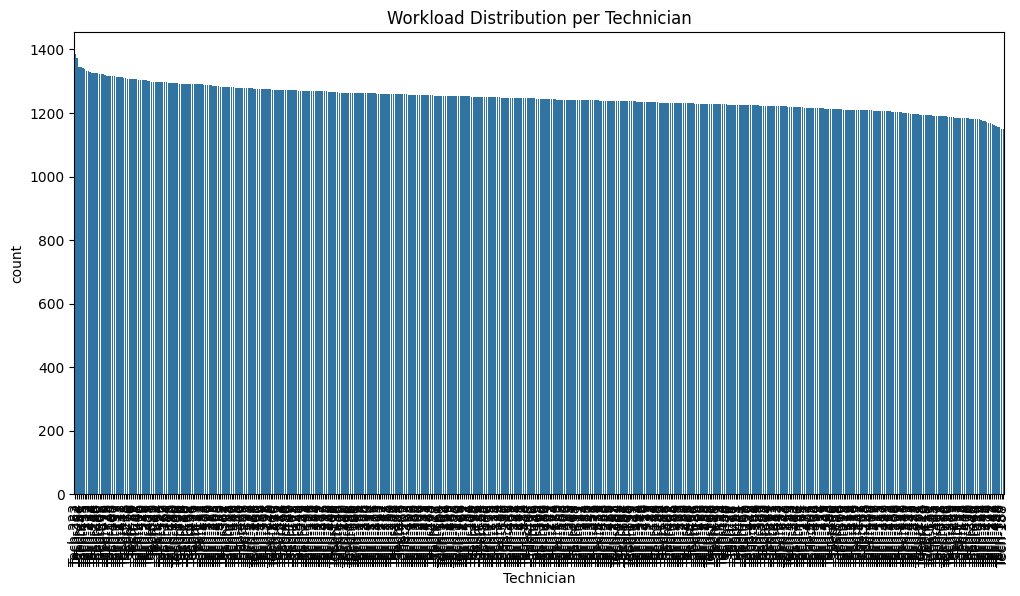

In [ ]:

#1. Workload Distribution of Technicians
import seaborn as sns
import matplotlib.pyplot as plt

# Plot technician workload
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Technician', order=df['Technician'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Workload Distribution per Technician')
plt.show()


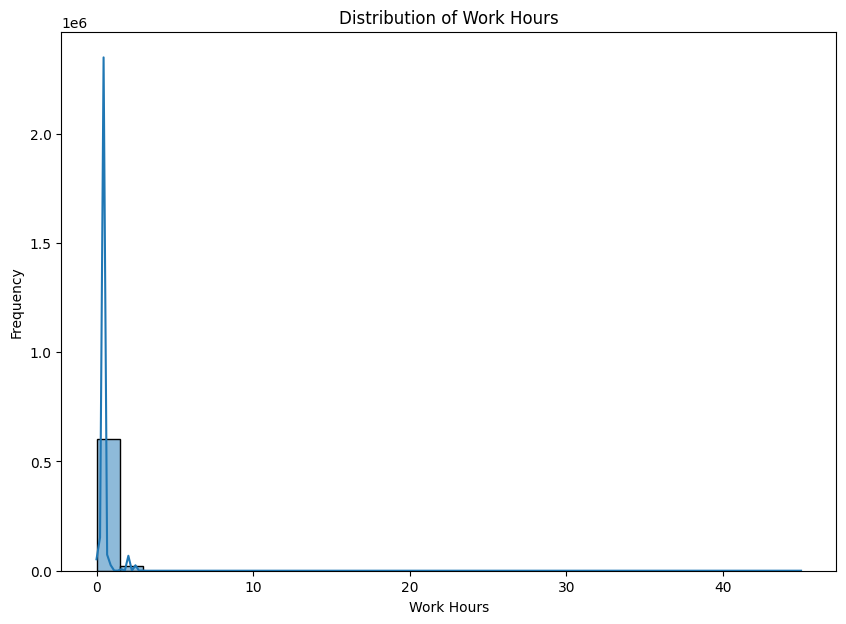

In [ ]:
#2. Distribution of work hours
plt.figure(figsize=(10, 7))
sns.histplot(df['Work_Hours'], bins=30, kde=True)
plt.title('Distribution of Work Hours')
plt.xlabel('Work Hours')
plt.ylabel('Frequency')
plt.show()


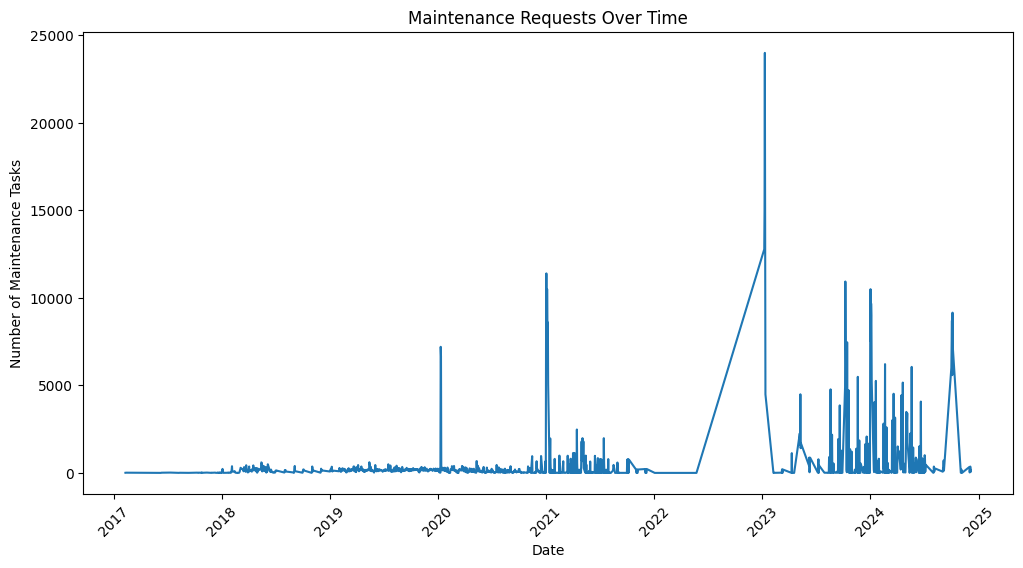

In [ ]:
# 3. no of Maintenance task  trend over time
df['Request_Date'] = df['Request_Time'].dt.date

plt.figure(figsize=(12, 6))
df.groupby('Request_Date').size().plot()
plt.xlabel('Date')
plt.ylabel('Number of Maintenance Tasks')
plt.title('Maintenance Requests Over Time')
plt.xticks(rotation=45)
plt.show()


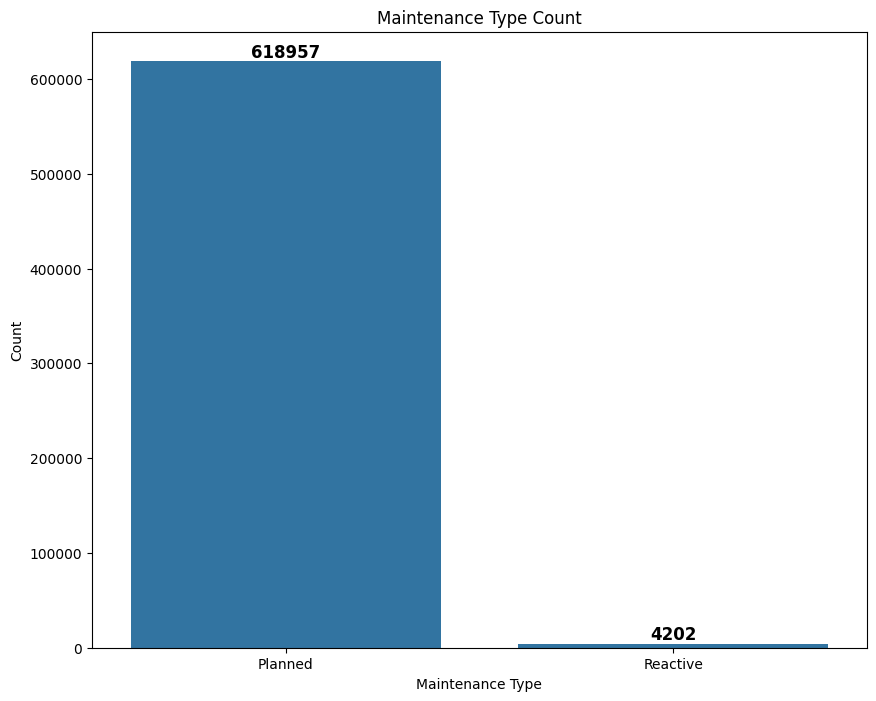

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Maintenance_Type')

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Maintenance Type Count')
plt.xlabel('Maintenance Type')
plt.ylabel('Count')
plt.show()


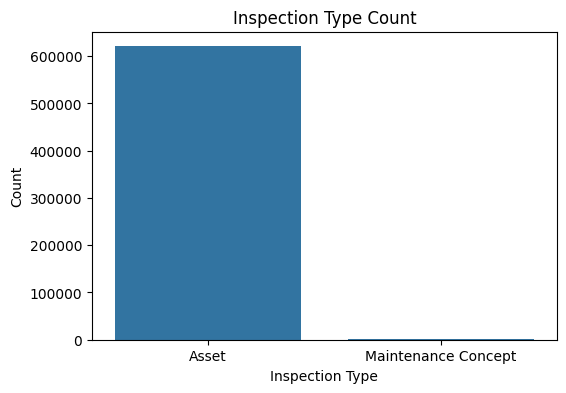

In [318]:
#Count of Inspection Types
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Inspection_Type')
plt.title('Inspection Type Count')
plt.xlabel('Inspection Type')
plt.ylabel('Count')
plt.show()


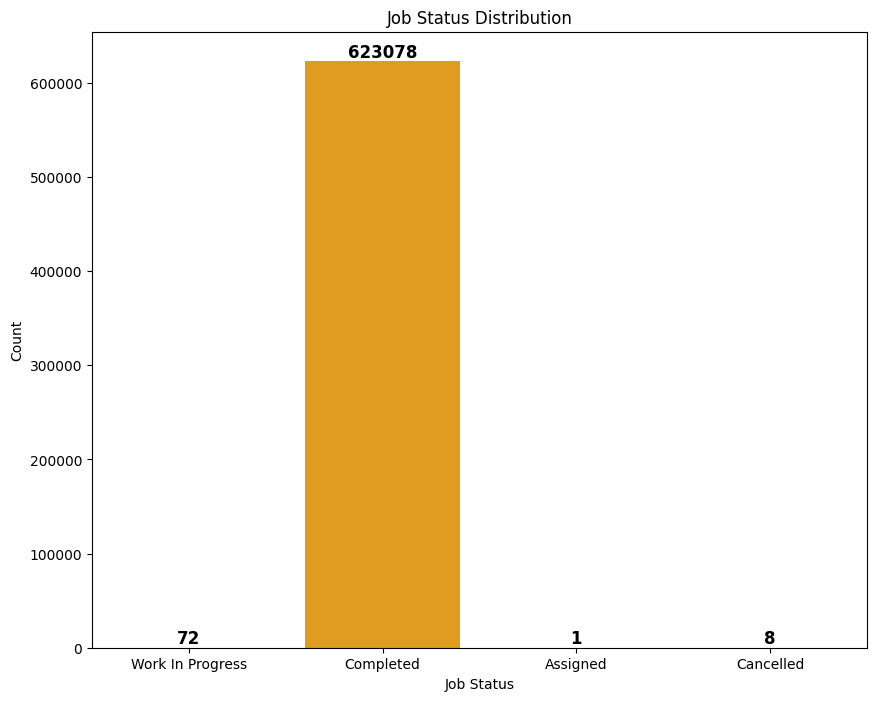

In [315]:
#Job Status Distribution

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='Job_Status',color='Orange')

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Job Status Distribution')
plt.xlabel('Job Status')
plt.ylabel('Count')
plt.show()


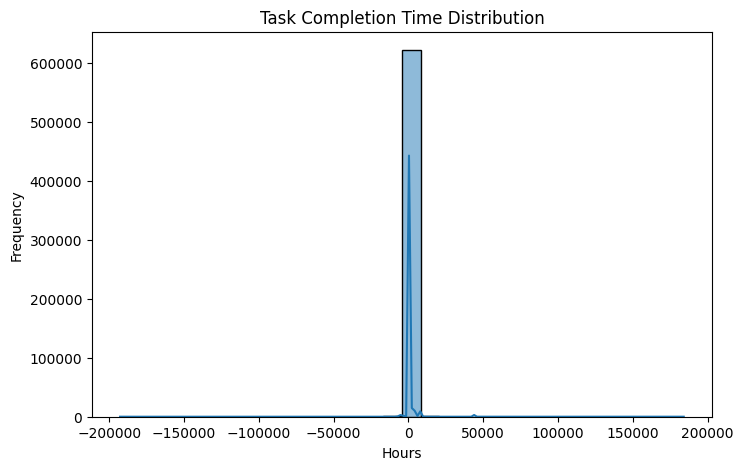

In [320]:
#Task Completion Time Distribution
df['Task_Duration'] = (df['Completion_Time'] - df['Start_Time']).dt.total_seconds() / 3600

plt.figure(figsize=(8, 5))
sns.histplot(df['Task_Duration'], bins=30, kde=True)
plt.title('Task Completion Time Distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()


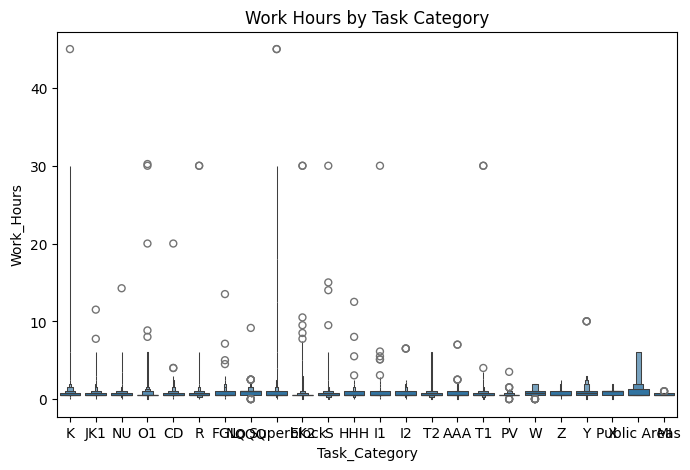

In [321]:
#Work Hours vs Task Category
plt.figure(figsize=(8, 5))
sns.boxenplot(data=df, x='Task_Category', y='Work_Hours')
plt.title('Work Hours by Task Category')
plt.show()


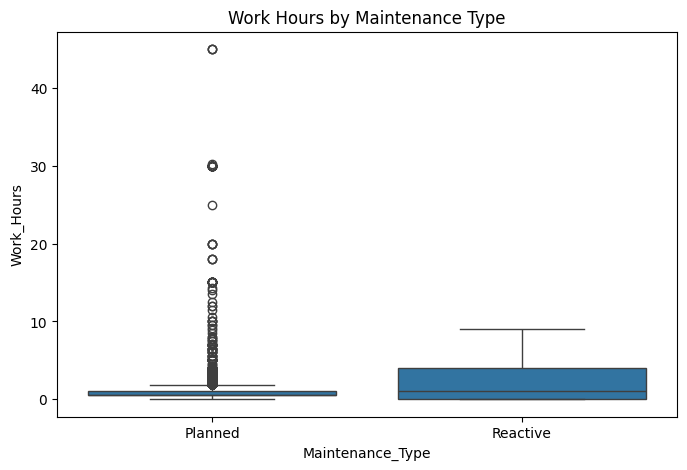

In [322]:
#Work Hours vs Maintenance Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Maintenance_Type', y='Work_Hours')
plt.title('Work Hours by Maintenance Type')
plt.show()


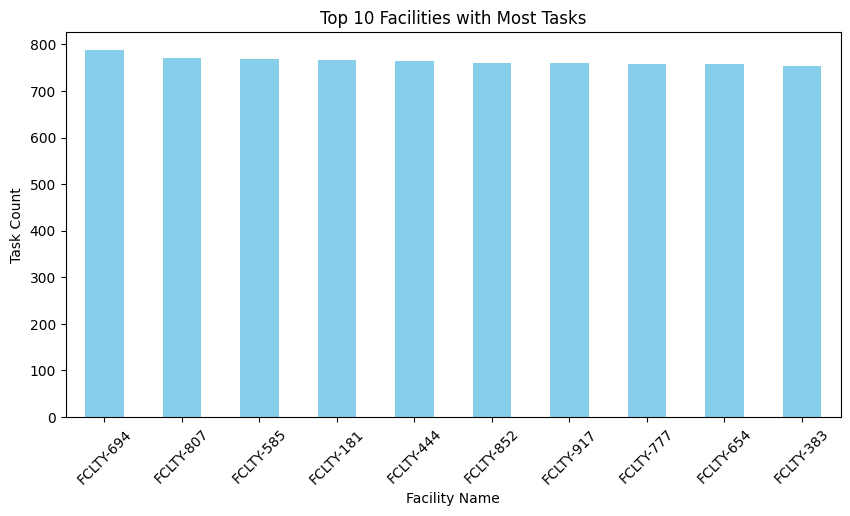

In [323]:
#Top 10 Facilities with Most Tasks
plt.figure(figsize=(10, 5))
df['Facility_Name'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Facilities with Most Tasks")
plt.xlabel("Facility Name")
plt.ylabel("Task Count")
plt.xticks(rotation=45)
plt.show()


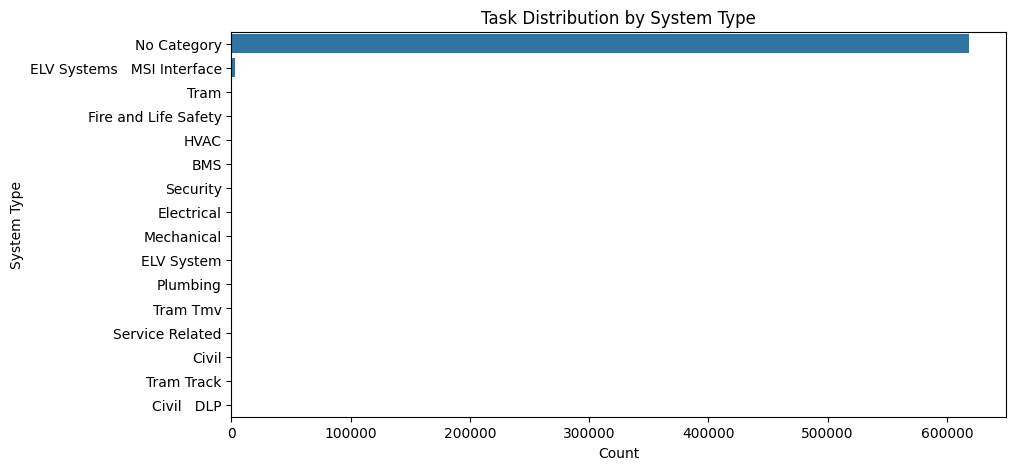

In [324]:
#Task Distribution by System Type
plt.figure(figsize=(10, 5))
sns.countplot(y=df['System_Type'], order=df['System_Type'].value_counts().index)
plt.title("Task Distribution by System Type")
plt.xlabel("Count")
plt.ylabel("System Type")
plt.show()


C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\2243308478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Request_Month', palette='coolwarm')


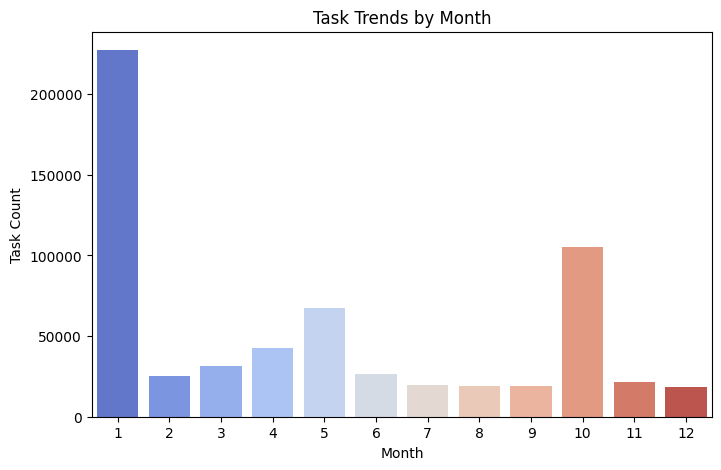

In [325]:
#. Task Trends by Month
df['Request_Month'] = df['Request_Time'].dt.month

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Request_Month', palette='coolwarm')
plt.title('Task Trends by Month')
plt.xlabel('Month')
plt.ylabel('Task Count')
plt.show()



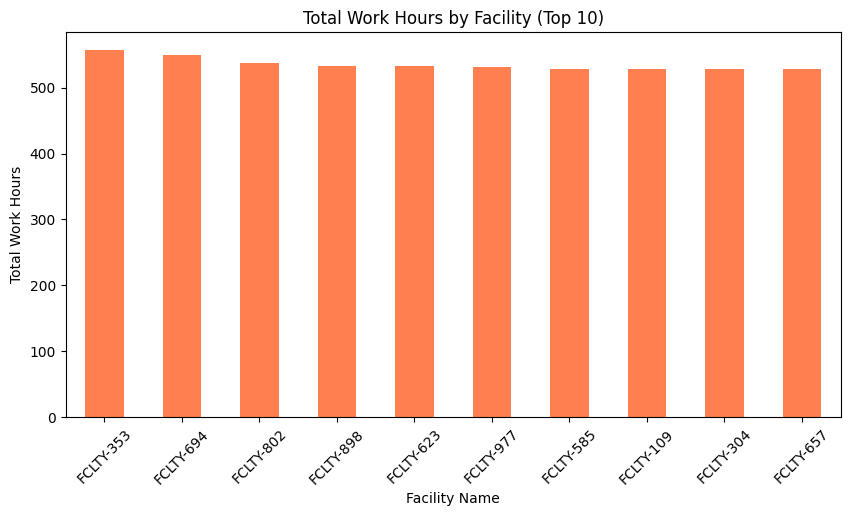

In [326]:
#. Work Hours by Facility
plt.figure(figsize=(10, 5))
df.groupby('Facility_Name')['Work_Hours'].sum().nlargest(10).plot(kind='bar', color='coral')
plt.title("Total Work Hours by Facility (Top 10)")
plt.xlabel("Facility Name")
plt.ylabel("Total Work Hours")
plt.xticks(rotation=45)
plt.show()


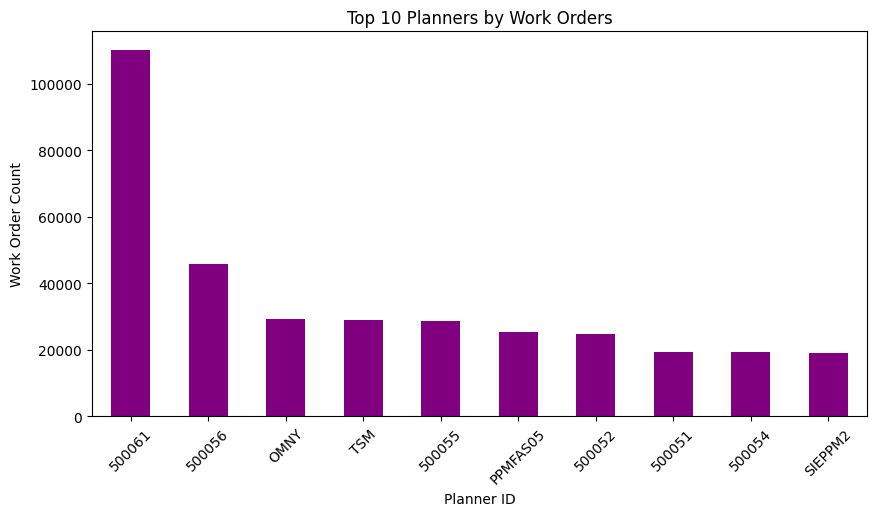

In [327]:
#. Work Orders by Planner
plt.figure(figsize=(10, 5))
df['Planner_ID'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title("Top 10 Planners by Work Orders")
plt.xlabel("Planner ID")
plt.ylabel("Work Order Count")
plt.xticks(rotation=45)
plt.show()


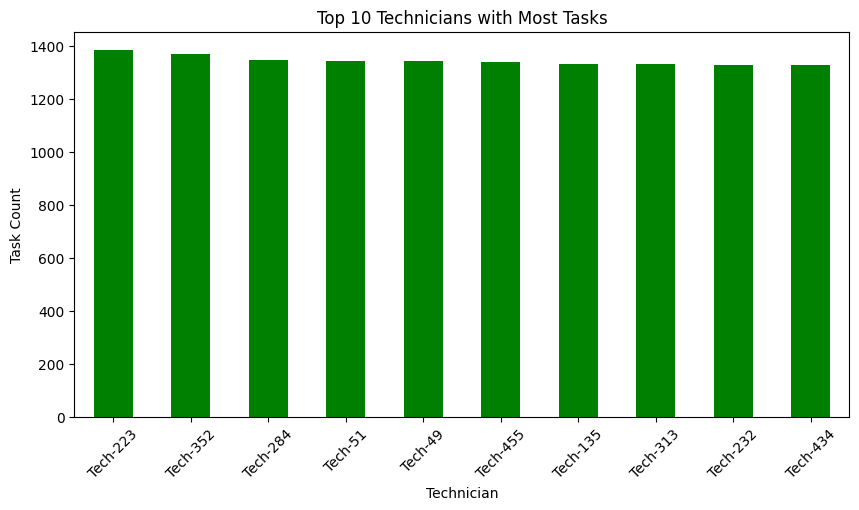

In [328]:
#. Technician Workload Distribution
plt.figure(figsize=(10, 5))
df['Technician'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title("Top 10 Technicians with Most Tasks")
plt.xlabel("Technician")
plt.ylabel("Task Count")
plt.xticks(rotation=45)
plt.show()


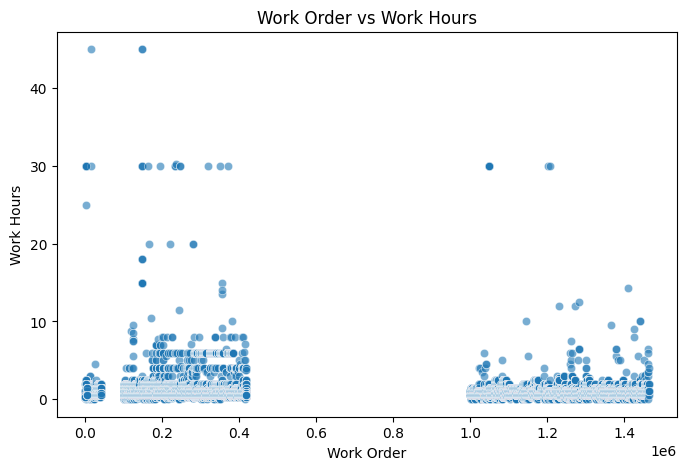

In [329]:
#. Work Order vs Work Hours Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Work_Order', y='Work_Hours', alpha=0.6)
plt.title('Work Order vs Work Hours')
plt.xlabel('Work Order')
plt.ylabel('Work Hours')
plt.show()


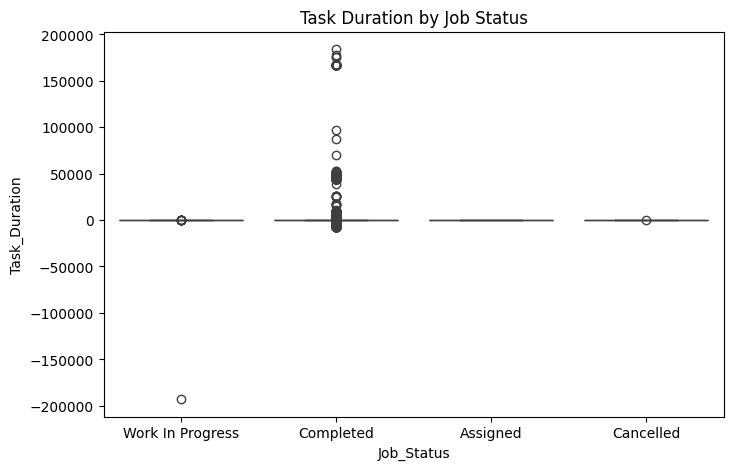

In [330]:
#. Box Plot of Task Duration by Job Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Job_Status', y='Task_Duration')
plt.title('Task Duration by Job Status')
plt.show()


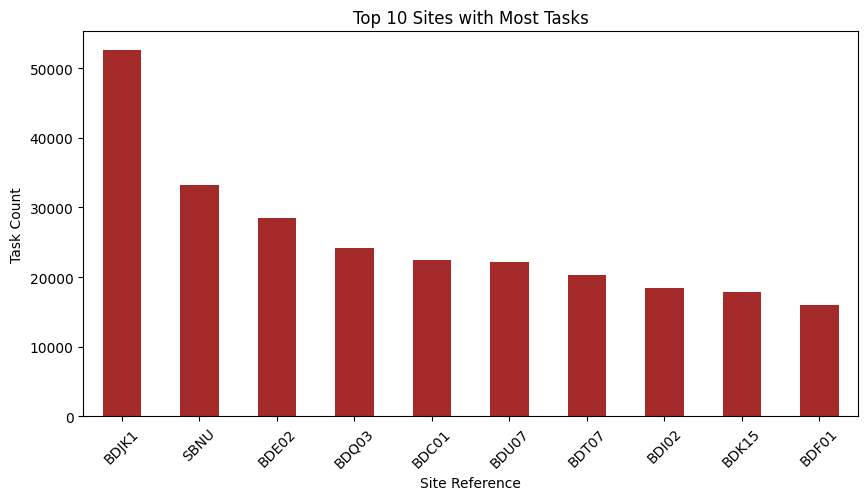

In [331]:
#. Task Count by Site Reference
plt.figure(figsize=(10, 5))
df['Site_Reference'].value_counts().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Sites with Most Tasks")
plt.xlabel("Site Reference")
plt.ylabel("Task Count")
plt.xticks(rotation=45)
plt.show()


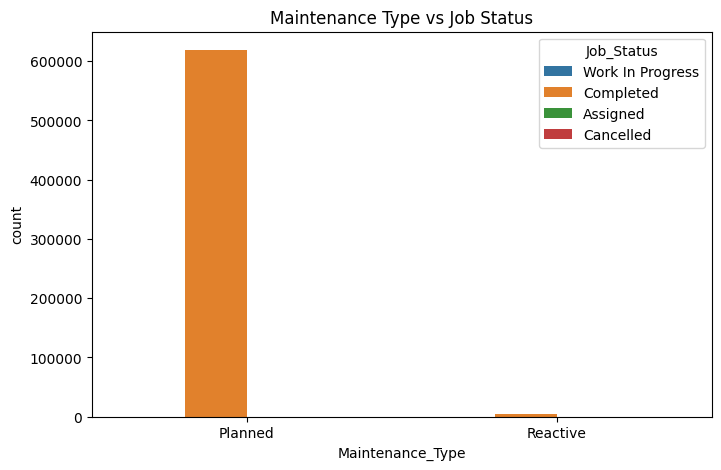

In [332]:
#. Maintenance Type vs Job Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Maintenance_Type', hue='Job_Status')
plt.title('Maintenance Type vs Job Status')
plt.show()


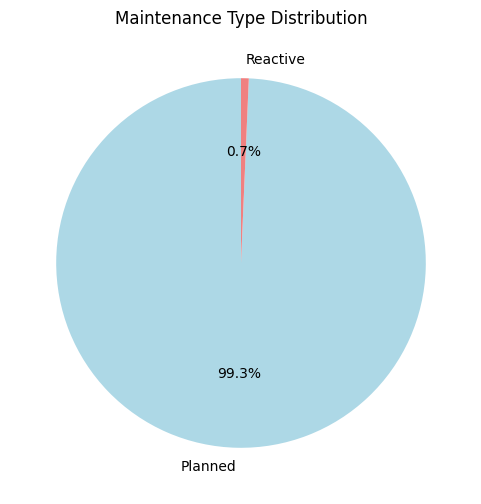

In [333]:
#1. Task Distribution by Maintenance Type (Pie Chart)
plt.figure(figsize=(6, 6))
df['Maintenance_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90)
plt.title("Maintenance Type Distribution")
plt.ylabel('')
plt.show()


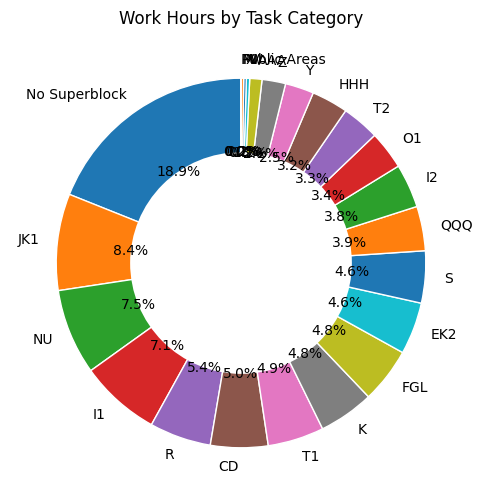

In [334]:
#3. Work Hours Distribution by Task Category (Donut Chart)
task_category_counts = df['Task_Category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(task_category_counts, labels=task_category_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0,0), 0.6, fc='white'))  # Create a donut hole
plt.title("Work Hours by Task Category")
plt.show()


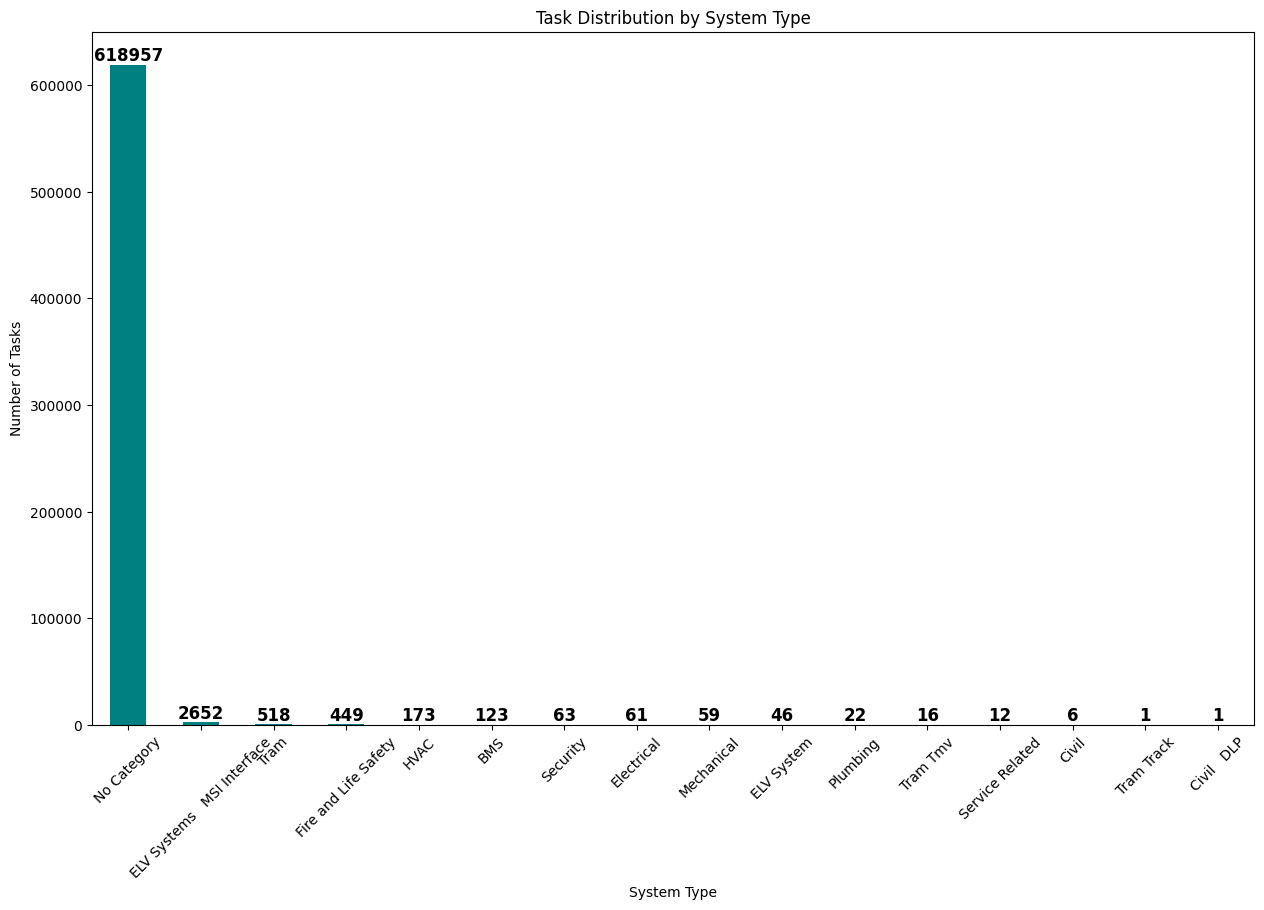

In [335]:
#4. Task Distribution by System Type (Bar Chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
ax = df['System_Type'].value_counts().plot(kind='bar', color='teal')

# Add count labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), 
            str(int(p.get_height())), 
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Task Distribution by System Type")
plt.xlabel("System Type")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.show()


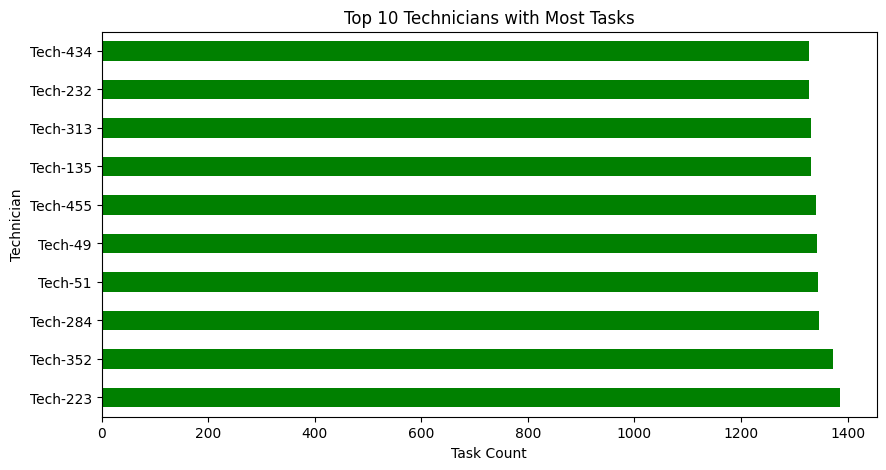

In [336]:
#7. Technician Workload Comparison (Horizontal Bar Chart)
plt.figure(figsize=(10, 5))
df['Technician'].value_counts().nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Technicians with Most Tasks")
plt.xlabel("Task Count")
plt.ylabel("Technician")
plt.show()


C:\Users\MSIS\AppData\Local\Temp\ipykernel_22944\3731849209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Task_Category', y='Work_Hours', palette="muted")


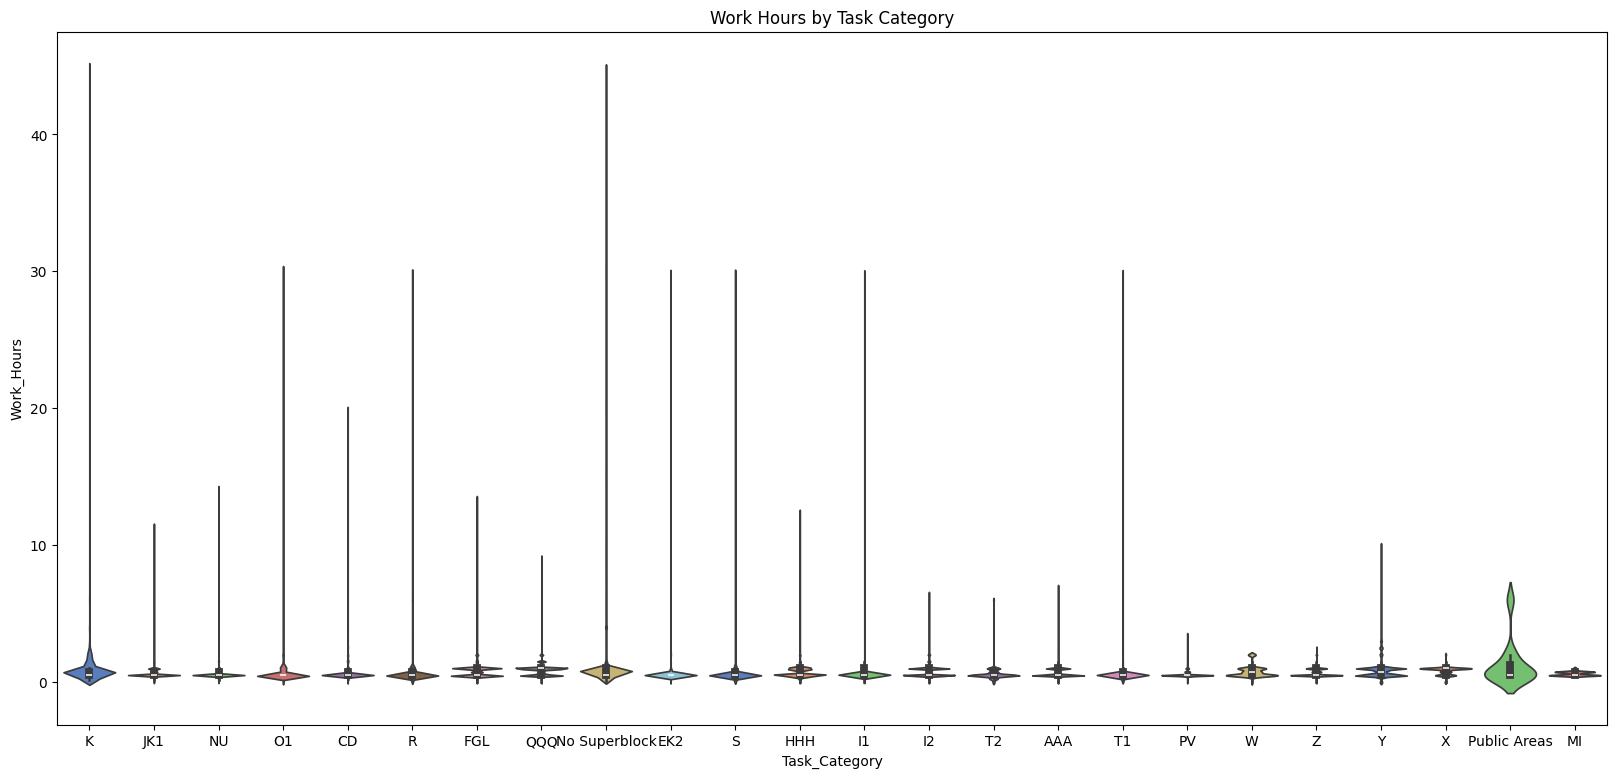

In [337]:
#8. Work Hours vs. Task Category (Violin Plot)
plt.figure(figsize=(20,9))
sns.violinplot(data=df, x='Task_Category', y='Work_Hours', palette="muted")
plt.title('Work Hours by Task Category')
plt.show()


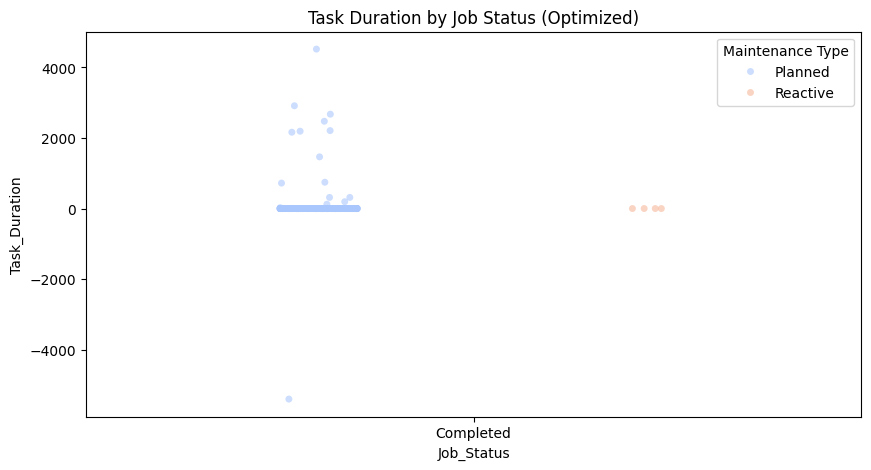

In [338]:
#9. Task Completion Time Comparison (Swarm Plot)
plt.figure(figsize=(10, 5))

# Reduce the number of points plotted to speed up rendering
sample_df = df.sample(n=1000, random_state=42)  # Adjust n as needed

sns.stripplot(data=sample_df, x='Job_Status', y='Task_Duration', hue='Maintenance_Type', 
              jitter=True, palette='coolwarm', alpha=0.6, dodge=True)

plt.title("Task Duration by Job Status (Optimized)")
plt.legend(title="Maintenance Type")
plt.show()


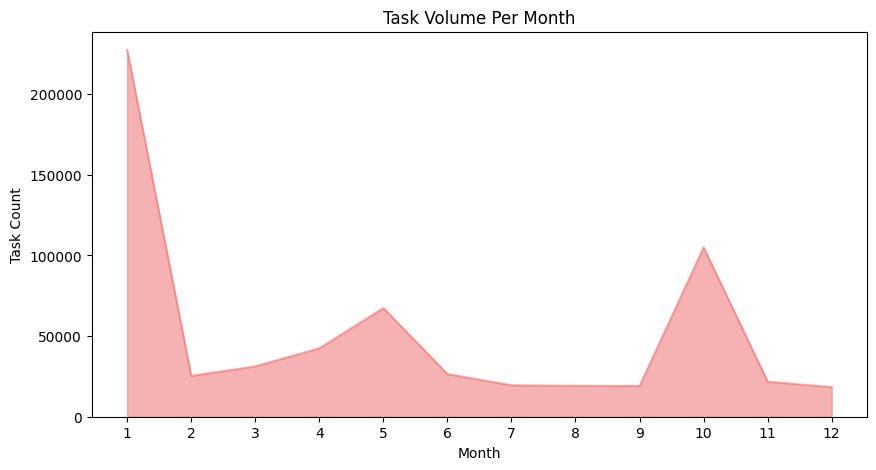

In [339]:
#10. Monthly Task Volume (Area Plot)
df['Request_Month'] = pd.to_datetime(df['Request_Time']).dt.month

plt.figure(figsize=(10, 5))
df.groupby('Request_Month').size().plot(kind='area', color='lightcoral', alpha=0.6)
plt.xlabel('Month')
plt.ylabel('Task Count')
plt.title('Task Volume Per Month')
plt.xticks(range(1, 13))
plt.show()


In [341]:
#label encoding



from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
categorical_columns = ['Inspection_Type', 'Maintenance_Type', 'Project_Stage', 
                       'Task_Category', 'Job_Status']

for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

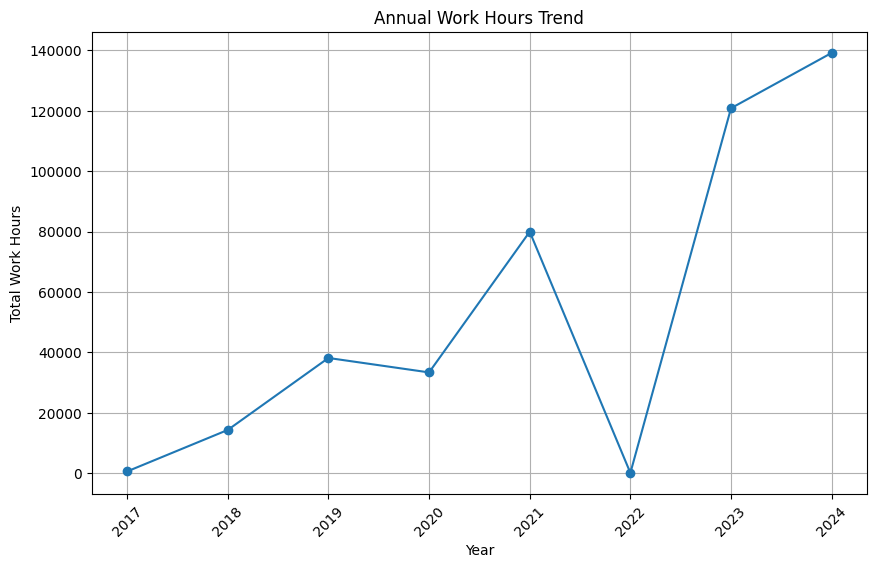

In [342]:
# Extract the year from 'Completion_Time'
df2['Year'] = df2['Completion_Time'].dt.year

# Filter data to include only years from 2017 to 2024
df_filtered = df2[df2['Year'].between(2017, 2024)]

# Aggregate work hours by year
annual_work_hours = df_filtered.groupby('Year')['Work_Hours'].sum()

# Plot the work hours by year
plt.figure(figsize=(10,6))
annual_work_hours.plot(kind='line', marker='o')
plt.title('Annual Work Hours Trend')
plt.xlabel('Year')
plt.ylabel('Total Work Hours')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()
